In [43]:
using CovidSim
using Plots

In [10]:
seattle = (;fips=53033); newyork=(;fips=36061); bismarck=(;fips=38015)

(fips = 38015,)

In [12]:
cd("/Users/lewis/Dropbox/Online Coursework/Covid/data")
geo = CovidSim.readgeodata("../data/geo2data.csv")
geo[:,1:7]

15×7 Array{Any,2}:
  6075  "San Francisco"  "San Francisco"  "CA"  2   881549  17255
 53033  "Seattle"        "Seattle"        "WA"  2  2252782   5175
 36061  "New York"       "New York"       "NY"  1  8336817  40306
 39035  "Cuyahoga"       "Cleveland"      "OH"  2  1235072   3063
 48113  "Dallas"         "Dallas"         "TX"  2  2635516   4000
 39151  "Stark"          "Canton"         "OH"  3   370606   1688
 34013  "Essex"          "Newark"         "NJ"  3   798975   6396
 13089  "DeKalb"         "Atlanta"        "GA"  2  1063937   2708
 17167  "Sangamon"       "Springfield"    "IL"  3   194672   1747
 38015  "Burleigh"       "Bismarck"       "ND"  3    95626   2157
  4013  "Maricopa"       "Phoenix"        "AZ"  1  4485414   2798
 42003  "Allegheny"      "Pittsburgh"     "PA"  2  1216045   5461
 27053  "Hennepin"       "Minneapolis"    "MN"  2  1265843   7821
 31055  "Douglas"        "Omaha"          "NE"  2   571327   3378
  8031  "Denver"         "Denver"         "CO"  2   72721

In [13]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim.var"#scase#83"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}) (generic function with 1 method)

In [15]:
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


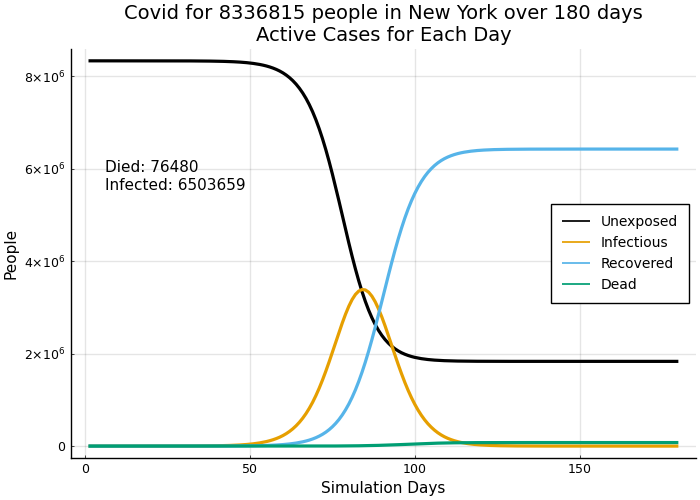

In [16]:
cumplot(series,newyork.fips,geo=geo)

In [17]:
infection_outcome(series, newyork.fips)

(infect_pop = 0.7801144298735884, death_pct = 0.011759523284178997, death_pop = 0.009173773802422486)

### Strong Social Distancing

Reset the model to defaults.

In [19]:
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


In [20]:
str_50 = sd_gen(start=50, comply=.9, cf=(.5,1.2), tf=(.18,.42))

(::CovidSim.var"#sd_mod#95"{CovidSim.var"#sd_mod#94#96"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [21]:
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
       spreadcases=[str_50],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


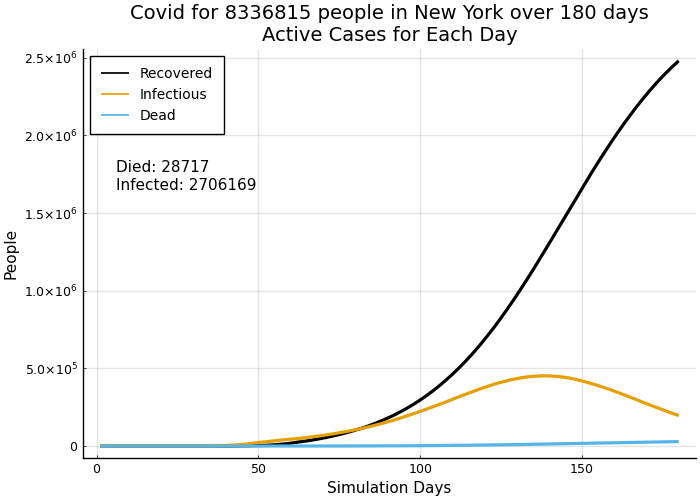

In [22]:
cumplot(series,newyork.fips,[recovered, infectious, dead],geo=geo)

In [23]:
infection_outcome(series, newyork.fips)

(infect_pop = 0.34821668578469295, death_pct = 0.009892125982082082, death_pop = 0.0034446033248452736)

### Open Totally (which won't happen...)
This uses opening back to essentially no social distancing and an R0 between 1.6 and 1.8. People will voluntarily be more prudent and government recommendations and policies will provide for more limited opening. So, this shows why complete opening isn't possible:  the full force of the virus does return with only a slight delay.

In [86]:
# Reset to defaults
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


In [87]:
open = sd_gen(start=95, comply=0.0, cf=(.3,1.8), tf=(.18,.62))

(::CovidSim.var"#sd_mod#95"{CovidSim.var"#sd_mod#94#96"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [88]:
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50, open],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


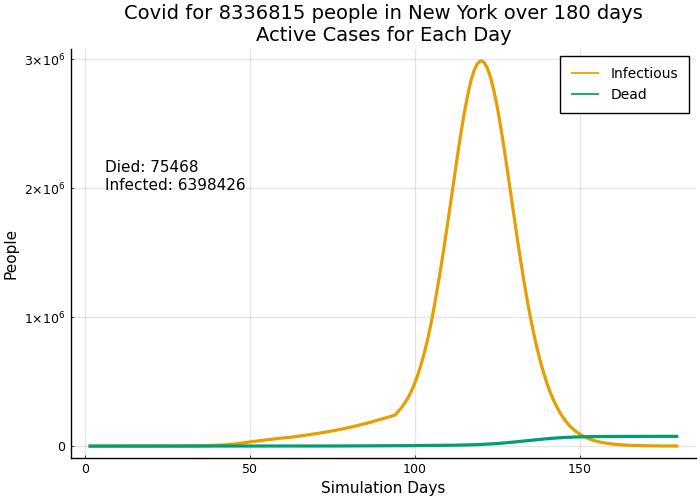

In [89]:
cumplot(series,newyork.fips,[infectious, dead],geo=geo)

In [28]:
r0_sim(;sa_pct=[1.0,0.0,0.0], density_factor=1.25, dt=alldict["dt"], decpoints=alldict["decpoints"],
        cf=[], tf=[], compliance=[1.0], shift_contact=(.6,1.8), shift_touch=(.18,.62), disp=false, env=env)

(day = 180, r0 = 1.8615384615384616, spreaders = 2080, contacts = 43212, touched = 23721, infected = 3872, contact_ratio = 20.775, touch_ratio = 11.404326923076923)

The preceding estimate of R0 tracks one cohort across all demographic groups of the simulation through the duration of the disease for 25 days, though much of the cohort will "drop out" through recovery or death prior to the 25th day. Infectiveness varies across the number of days a person has been infected.  

### Limited Opening

In [90]:
# reset the model to defaults
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


In [91]:
open = sd_gen(start=95, comply=0.7, cf=(.5,1.5), tf=(.25,.50))

(::CovidSim.var"#sd_mod#95"{CovidSim.var"#sd_mod#94#96"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [92]:
alldict, env, series = run_a_sim(180, newyork.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50, open],
       runcases=[seed_1_6]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


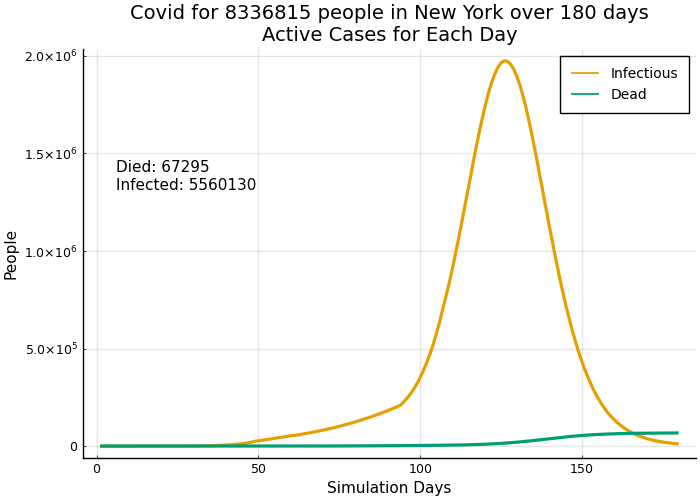

In [93]:
cumplot(series,newyork.fips,[infectious, dead],geo=geo)

In [94]:
deadseries_lo = series[newyork.fips][:cum][:,[map2series.dead]...]
n = size(deadseries_lo,1)

180

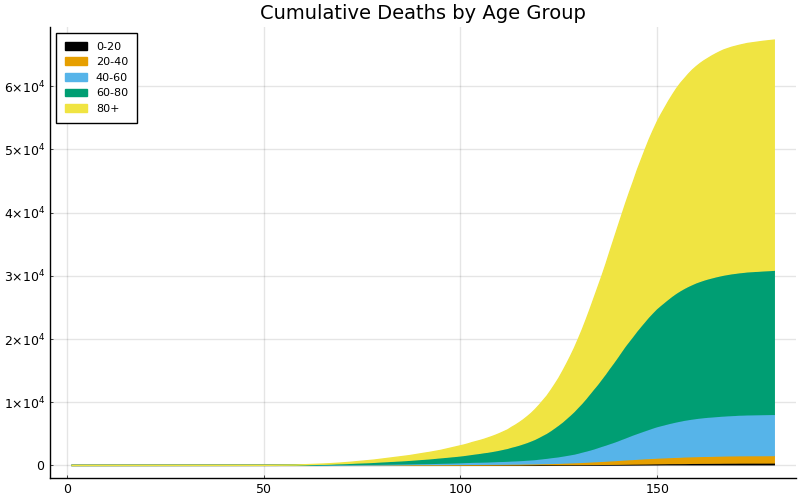

In [95]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "total"]
ageserieslabels = [agelabels[1] agelabels[2] agelabels[3] agelabels[4] agelabels[5]]
age_dist_lo = areaplot(1:n, deadseries_lo[:,1:5],labels=ageserieslabels, size=(800,500),
    title="Cumulative Deaths by Age Group", legend=:topleft)

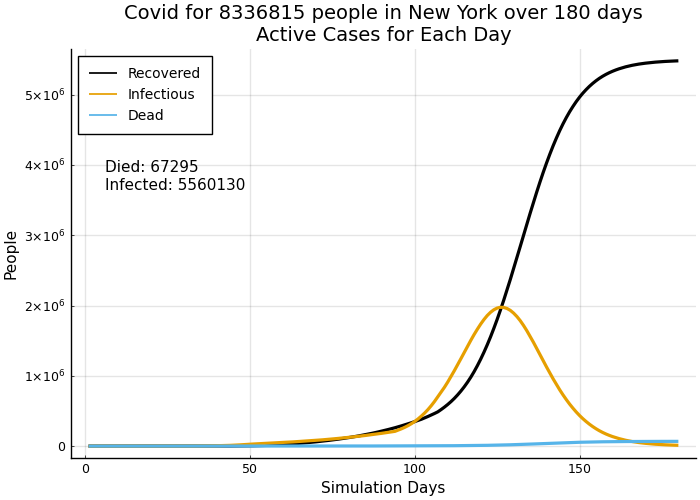

In [96]:
cumplot(series,newyork.fips,[recovered,infectious, dead],geo=geo)

Even with some restrictions still in place, this opening results in only about 10 to 11% reduction in deaths compared to never having implemented social distancing or social distancing followed by completely opening. This alternative would *not* be recommended. Rigorous implementation of test, trace and isolate with idespread testing of asymptomatic people, same-day test results, and high compliance with contact tracing and quarantine isolation is very hard to achieve, but is a preferred alternative.  If the high degree of compliance and implementation rigor is not possible, is there an alternative?

### An Alternative: Fewer Restrictions with Protection of the Vulnerable
Note that this cases models vulnerable people as the age groups from 60 to 80 and over 80. Other people are vulnerable: people with diabetes, hypertension, immuno-compromise, cancer patients, smokers, and others across age groups. It's beyond this model to attempt to represent these vulnerabilities across age groups at this poing.

In [33]:
open_more = sd_gen(start=95, cf=(.5,1.55), tf=(.25,.55),comply=.6)

(::CovidSim.var"#sd_mod#95"{CovidSim.var"#sd_mod#94#96"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [34]:
r0_sim(;sa_pct=[1.0,0.0,0.0], density_factor=1.25, dt=alldict["dt"], decpoints=alldict["decpoints"],
        cf=[], tf=[], compliance=[.65], shift_contact=(.5,1.55), shift_touch=(.25,.52), disp=false, env=env)

(day = 180, r0 = 1.3677884615384615, spreaders = 2080, contacts = 36582, touched = 17340, infected = 2845, contact_ratio = 17.5875, touch_ratio = 8.336538461538462)

In [35]:
function isolate_vulnerable(locale, opendat, isodat, testdat, env)
    if ctr[:day] == 105
        isolate!(.70,[unexposed, nil,mild,sick, severe],[5],1:laglim, locale, opendat, isodat)
        isolate!(.50,[unexposed,nil,mild,sick, severe],[4],1:laglim, locale, opendat, isodat)
    end
end

isolate_vulnerable (generic function with 1 method)

In [59]:
# reset the model to defaults
alldict, env, series = run_a_sim(180,newyork.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[]);

Simulation completed for 180 days.


In [84]:
alldict, env, series = run_a_sim(180, newyork.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50, open],
       runcases=[seed_1_6, isolate_vulnerable]);

*** seed day 1 locale 36061....
Simulation completed for 180 days.


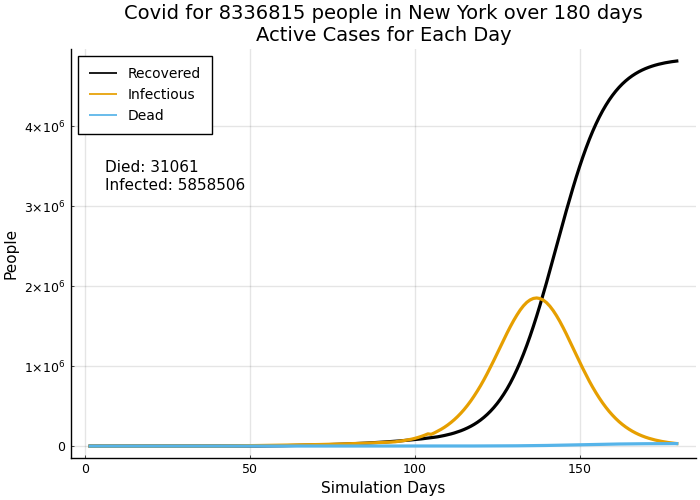

In [85]:
cumplot(series,newyork.fips,[recovered,infectious, dead],geo=geo)

**Assessment:**
With opening somewhat more liberal and with lower compliance, we observe simulated deaths that are less than half of both the case of no social distancing ever and social distancing followed by opening with light restrictions held in place. The number of deaths is roughly 30 to 35% higher than maintaining restrictive social distancing for four months, until the end of the simulation duration of 180 days. But, that is not occurring anywhere in the US and is not politically possible nor practicable as compliance would continue to wain despite the terrible outcomes of opening up. 

Comparing the protect the vulnerable approach to versions of opening up, with and without test, trace and isolate
- deaths roughly 50% lightly restricted opening up;
- somewhat lighter restrictions than the preceding;
- deaths roughly 10% higher than very rigorous test, trace and isolate
- deaths roughly 50% lower than loosely implemented test, trace and isolate


In [62]:
deadseries_pv = series[newyork.fips][:cum][:,[map2series.dead]...]
n = size(deadseries_pv,1)

180

## Compare Age Distribution for Different Policies

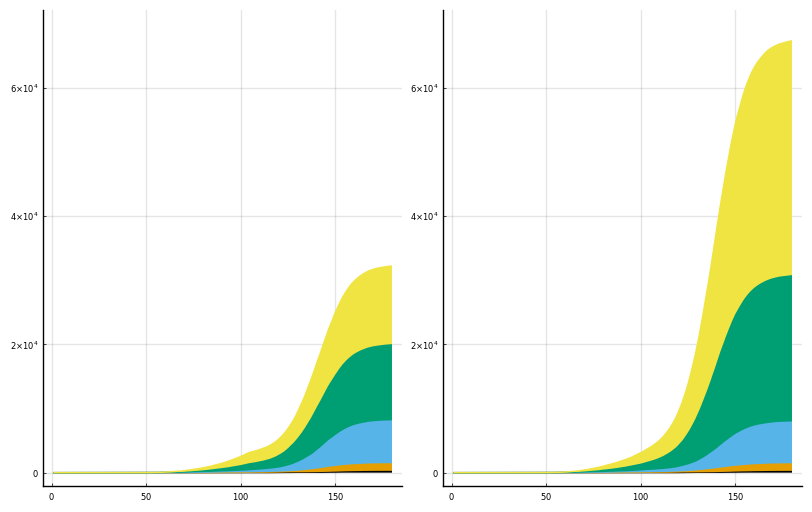

In [97]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "total"]
ageserieslabels = [agelabels[1] agelabels[2] agelabels[3] agelabels[4] agelabels[5]]
age_dist_pv = areaplot(1:n, deadseries_pv[:,1:5],labels=ageserieslabels, size=(800,500),
    title="Cumulative Deaths by Age Group", legend=:topleft)

pyplot()
l = @layout([x y])
plot([age_dist_pv, age_dist_lo]..., layout=l, legend=false, tickfontsize=6, ylims=[0,7e4], title=nothing)
gui()

In [45]:
protected_group = age_dist .* series[newyork.fips][:cum][1,map2series.unexposed[6]]
protected_group = protected_group[4] + protected_group[5]

1.859108407e6

In [46]:
caseload_protected = 150 # per month
workers_protected = protected_group / caseload_protected
tests_required_month = 8 * workers_protected
tests_required_day = tests_required_month / 30

3305.0816124444445

In [47]:
tests_required_month = 30 * workers_protected
tests_required_day = tests_required_month / 30

12394.056046666667